In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import scipy.stats as stats

## Websracping

In [2]:
page = requests.get("https://www.worldometers.info/coronavirus/")
soup = BeautifulSoup(page.content, 'lxml')
table = soup.find('table',{'id':"main_table_countries_today"})
string = table.find_all('tr',{"style":''})
char_to_remove = ['\n']
data = []
column_name = ['Country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','New Recovered','ActiveCases','Serious','Cases/1M pop','Deaths/1M pop','TotalTests','Tests/1M pop','Population',"Continent"]
for i in string:
    country = i.get_text().split('\n')
    continent = country[16]
    country = country[2:16]
    country.append(continent)
    data.append(country)
country_data = data[2:]
country_data = pd.DataFrame(country_data,columns = column_name)

## Data cleaning

### 

In [3]:
data = country_data[['Country','TotalCases','TotalRecovered','Cases/1M pop','Deaths/1M pop','Population','Continent']].copy()
char_to_remove = [',','+']
for i in range(1,7):
    for char in char_to_remove:
        data.iloc[:,i] = data.iloc[:,i].str.replace(char,'')
data.iloc[211,5] = data.iloc[:211,5].astype(int).sum()
print(data)

                   Country TotalCases TotalRecovered Cases/1M pop  \
0                      USA   50705257       39951693       151904   
1                    India   34682736       34114331        24782   
2                   Brazil   22184824       21407699       103313   
3                       UK   10719165        9414117       156714   
4                   Russia    9956679        8673518        68185   
..                     ...        ...            ...          ...   
207  Saint Pierre Miquelon         91             60        15818   
208             Montserrat         44             42         8807   
209         Western Sahara         10              8           16   
210                  China      99517          93659           69   
211                 Total:  269447695      242336762      34567.6   

    Deaths/1M pop   Population      Continent  
0            2449   333797157   North America  
1             339  1399531786            Asia  
2            2872   2147345

<ipython-input-3-b8c596d0d02c>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data.iloc[:,i] = data.iloc[:,i].str.replace(char,'')


## Graph
### Matlibplot

In [4]:
df1 = data[['Country','TotalCases','Population']].copy()
df1.Population = df1.Population.astype(int)
df1.TotalCases = df1.TotalCases.astype(int)
list_other = df1.iloc[9:,:].sum()[1:3]
df1 = df1.iloc[:9,:]
df1 = df1.append({"Country":'Other Countries',
                  "TotalCases":list_other[0],
                  "Population":list_other[1]},
                 ignore_index = True)
Total = df1.TotalCases.sum()
proportion = 100.*df1.TotalCases/Total
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df1.Country, proportion)]

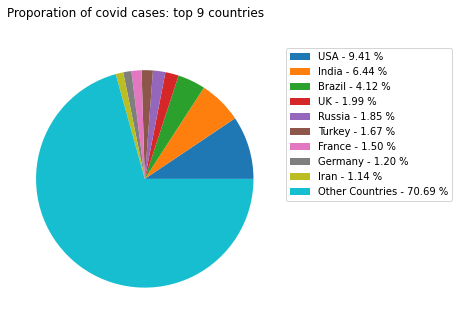

In [5]:
df1
fig = plt.figure(figsize = [10,5])
plt.pie(df1.TotalCases)
plt.legend(labels,bbox_to_anchor=(1,1))
plt.suptitle("Proporation of covid cases: top 9 countries")
plt.show()

This pie chart is about proporation of top 9 countries with most covid cases.
USA have the most covid-19 cases in the world. It is 9.39% of total cases of all contries. It is almost 1/10 of all cases in the world. Besides, sum of others contries is 70.67% of total cases.

### Seaborn

[Text(0, 0.5, 'Total cases per 1M population'),
 Text(0.5, 1.0, 'Box plot of Total cases/1M population of each country per continent')]

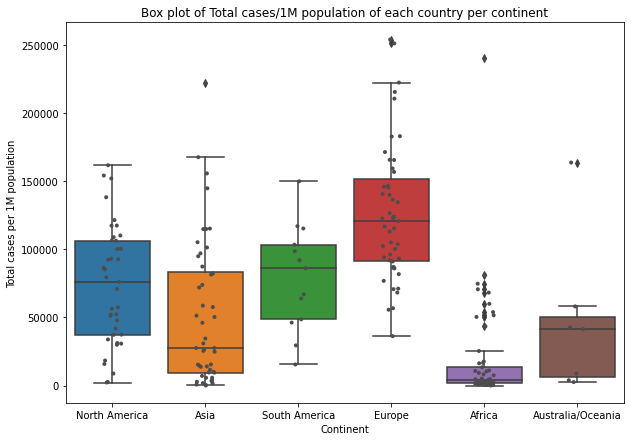

In [6]:
df2 = data[['Country',"Cases/1M pop",'Continent']].copy()
df2['Cases/1M pop'] = df2['Cases/1M pop'].astype(float)
df2 = df2.drop(211)
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data = df2, x = 'Continent', y = 'Cases/1M pop')
sns.stripplot(x="Continent", y="Cases/1M pop", data=df2,
              size=4, color=".3", linewidth=0)
ax.set(ylabel = "Total cases per 1M population",title = "Box plot of Total cases/1M population of each country per continent")

This box plot is about cases per one million population of each country group by continent. I notice that peopole in Europe has more probability of catching covid. But I don't know why Africa is better than other continent. 

(11,)
[50705257, 34682736, 22184824, 10719165, 9956679, 9002968, 8105785, 6463737, 6150843, 5354440, 5290190]
(11,)
[39951693, 34114331, 21407699, 9414117, 8673518, 8568914, 7275054, 5368300, 5957017, 5211264, 4943735]


<Figure size 432x288 with 0 Axes>

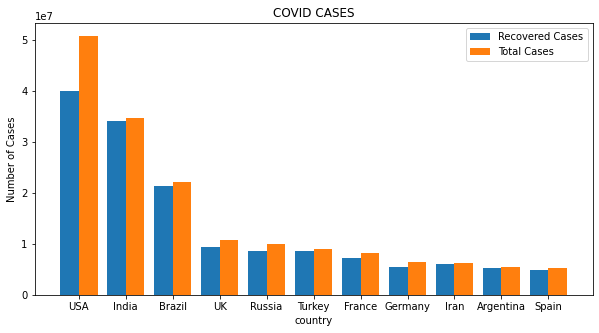

In [7]:
main_data = data[:11]
main_data
locations = main_data["Country"]
rcases = main_data["TotalRecovered"].to_numpy()
tcases = main_data["TotalCases"].to_numpy()

ttotals = []
print(tcases.shape)
for c in tcases:
    ttotals.append(int(c.replace(',', '')))
    # print(ttotals)
print(ttotals)

rtotals = []
print(rcases.shape)
for c in rcases:
    rtotals.append(int(c.replace(',', '')))
    # print(ttotals)
print(rtotals)




X_axis = np.arange(len(locations))


plt.gcf().autofmt_xdate()

fig = plt.figure(figsize = (10, 5))

plt.bar(X_axis - 0.2, rtotals, 0.4, label = 'Recovered Cases')
plt.bar(X_axis + 0.2, ttotals, 0.4, label = 'Total Cases')

plt.xticks(X_axis, locations)
plt.xlabel("country")
plt.ylabel("Number of Cases")
plt.title("COVID CASES")
plt.legend()
plt.gcf()
plt.show()

The bar chart that shows the the totalcase of covid and the total recovered case of covid. in top 10 countries.<br>
The USA has the most total cases covid and total recovered out of all the countries. India makes the second highest cases among all the counties. 

## statistics
### Anova test
H<sub>0</sub>: mean deaths per million of north America and Asia are the same.<br>
H<sub>a</sub>: mean deaths per million of north America and Asia are not the same<br>
Conduct the ANOVA test at the 5% level of significance<br>

In [8]:
df3 = data[['Deaths/1M pop','Continent']].copy()
df3.loc[:,'Deaths/1M pop'] = df3['Deaths/1M pop'].replace('',np.nan)
df3 = df3.loc[df3['Continent'].isin(['North America',"Asia"])]
df3 = df3.dropna()
stats.f_oneway(df3['Deaths/1M pop'][df3['Continent'] == 'North America'],
               df3['Deaths/1M pop'][df3['Continent'] == 'Asia'])

F_onewayResult(statistic=16.999732344097215, pvalue=8.820762972107e-05)

Conclusion: Consider p-value 0.000091281978 is smaller than 0.05,  deaths per million between north America and Asia are same. 